# TD 1 - Smart Machining - Exercise 1

This exercise will allow you to predict cutting forces and cutting power in external cylindrical turning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

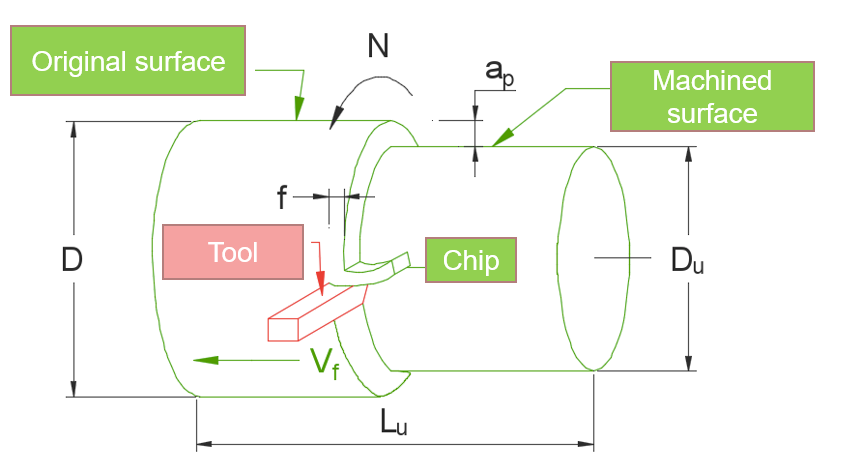

## 1) The input parameters for the turning processes are :


*   Initial Diameter is 1 inch - Calculate in mm
*   Final Diameter is 23 mm
*   The maximum depth of cut ($a_p$) is 1 mm
*   The feed per revolution is 0,1 mm/rev and the position angle $κ_r=30^o$
*   The cutting speed for Aluminum is $ V_c= $ 200 m/min - (remember to calculate in seconds for the Power !)
*   The estimated specific cutting force for this tool and material is 2000 MPa





In [2]:
Di=1 # inches or millimeters ?
Di=Di*25.4 # millimeters
print(Di)

25.4


In [12]:
Df=23 #mm
aptotal=(Di-Df)/2 # is it more than the maximum depth of cut ?
print(aptotal)

1.1999999999999993


We notice that ap is too high for a single pass, we need at least two passes

## 2) Calculate the depth of cut (mm), the spindle speed (in rpm), the feed velocity (mm/min)

In [4]:
ap=1 # we impose the maximum value
print(ap) #mm
Vc=200 # m/min
N=Vc*1000/(np.pi*Di) #rpm 
print(N)
ft=0.1 # mm/rev
f=ft*N # mm/min
print(f)

1
2506.3770565652812
250.63770565652814


## 3) Calculate the area of cut when the tool is in contact to the workpiece and the cutting force

$F_c = K_c a_p f_t$

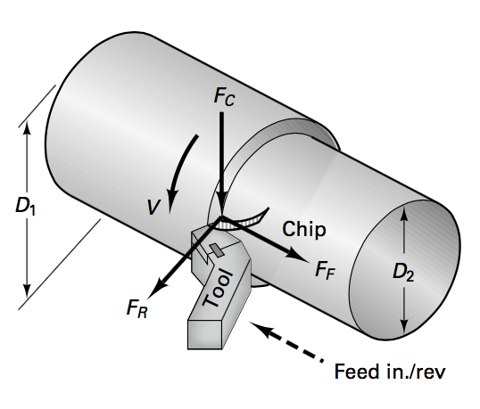

In [5]:
Kc=2000 #Mpa
Ac=ap*ft #mm^2
Fc=Kc*Ac #N
print(Ac)
print(Fc)

0.1
200.0


## 4) The lenght of cut on the bar is 100 mm, calculate the machining time for one pass and the volume for one pass

In [6]:
L=100 #mm
T=L/(f*1000) #min
Ts=T*60 #s
Vol=np.pi*L*((Di/2)**2-(Df/2)**2)
print(T)
print(Ts)
print(Vol) #mm^3

0.00039898226700590364
0.02393893602035422
9123.185066024756


## 5) Plot a curve of the cutting force (tangential) for the complete time of cut considering that the tool begin from 250 mm distance to the workpiece and the tool velocity when it is not cutting is 500 mm/min. Remember to predict for all passes

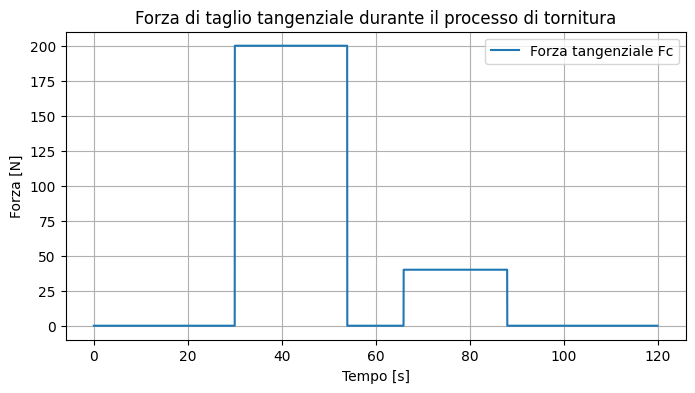

In [ ]:
v_approach = 500  # mm/min

tm=2 # minutes
time_vector = np.arange(0, 60*tm, 0.01)  # Create a time vector from 0 to 120 seconds (2 minutes) with 1-second intervals

# Force vector initializing
force_curve = np.zeros_like(time_vector, dtype=float)

# approaching time
t_approach = 250 / v_approach * 60  # ss

# cutting time
t_cut = L / f * 60  # s

# return time
t_back = L / v_approach * 60

# second pass
ap2= aptotal-ap
N2=1000*Vc/(np.pi* (Di-2*ap))
f2=ft*N2
t_cut2=L/f2*60
Fc2=Kc*ap2*ft


for i, t in enumerate(time_vector):
    if t < t_approach:
        force_curve[i] = 0  #approach
    elif t_approach <= t < t_approach + t_cut:
        force_curve[i] = Fc  #cut
    elif t_approach+t_cut <= t < t_approach + t_cut+t_back:
        force_curve[i] = 0  #come back
    elif t_approach + t_cut+t_back <= t < t_approach + t_cut+t_back+t_cut2:
        force_curve[i] = Fc2 #cut
    else:   
        force_curve[i] = 0  #process ended


plt.figure(figsize=(8,4))
plt.plot(time_vector, force_curve, label='Forza tangenziale Fc')
plt.xlabel('Tempo [s]')
plt.ylabel('Forza [N]')
plt.title('Forza di taglio tangenziale durante il processo di tornitura')
plt.grid(True)
plt.legend()
plt.show()


# 6) Now calculate the same in cutting power.

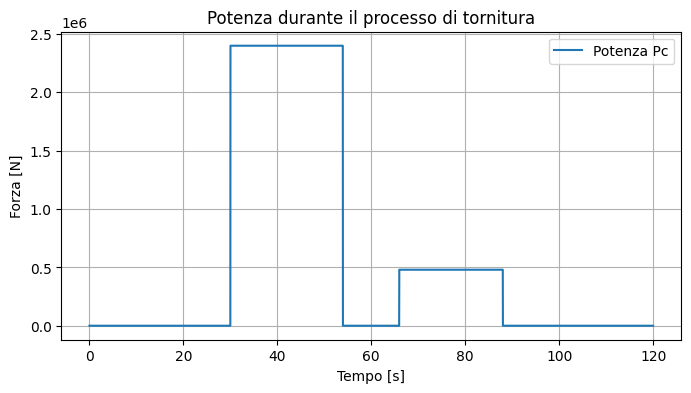

In [ ]:
power_curve = np.zeros_like(time_vector, dtype=float)

for i, t in enumerate(time_vector):
    if t < t_approach:
        power_curve[i] = 0  
    elif t_approach <= t < t_approach + t_cut:
        power_curve[i] = Fc*Vc*60  
    elif t_approach+t_cut <= t < t_approach + t_cut+t_back:
        power_curve[i] = 0  
    elif t_approach + t_cut+t_back <= t < t_approach + t_cut+t_back+t_cut2:
        power_curve[i] = Fc2*Vc*60  
    else:
        power_curve[i] = 0  


plt.figure(figsize=(8,4))
plt.plot(time_vector, power_curve, label='Potenza Pc')
plt.xlabel('Tempo [s]')
plt.ylabel('Forza [N]')
plt.title('Potenza durante il processo di tornitura')
plt.grid(True)
plt.legend()
plt.show()
